Iteration 10/100, Best fitness: 0.9400
Best parameters: rho=5.0000, sigma=1.4414, C=9.0156
Iteration 20/100, Best fitness: 0.9600
Best parameters: rho=5.0000, sigma=1.4503, C=8.5970
Iteration 30/100, Best fitness: 0.9600
Best parameters: rho=5.0000, sigma=1.4503, C=8.5970
Iteration 40/100, Best fitness: 0.9600
Best parameters: rho=5.0000, sigma=1.4503, C=8.5970
Iteration 50/100, Best fitness: 0.9600
Best parameters: rho=5.0000, sigma=1.4503, C=8.5970
Iteration 60/100, Best fitness: 0.9600
Best parameters: rho=5.0000, sigma=1.4503, C=8.5970
Iteration 70/100, Best fitness: 0.9600
Best parameters: rho=5.0000, sigma=1.4503, C=8.5970
Iteration 80/100, Best fitness: 0.9600
Best parameters: rho=5.0000, sigma=1.4503, C=8.5970
Iteration 90/100, Best fitness: 0.9600
Best parameters: rho=5.0000, sigma=1.4503, C=8.5970
Iteration 100/100, Best fitness: 0.9600
Best parameters: rho=5.0000, sigma=1.4503, C=8.5970
Accuracy: 0.96


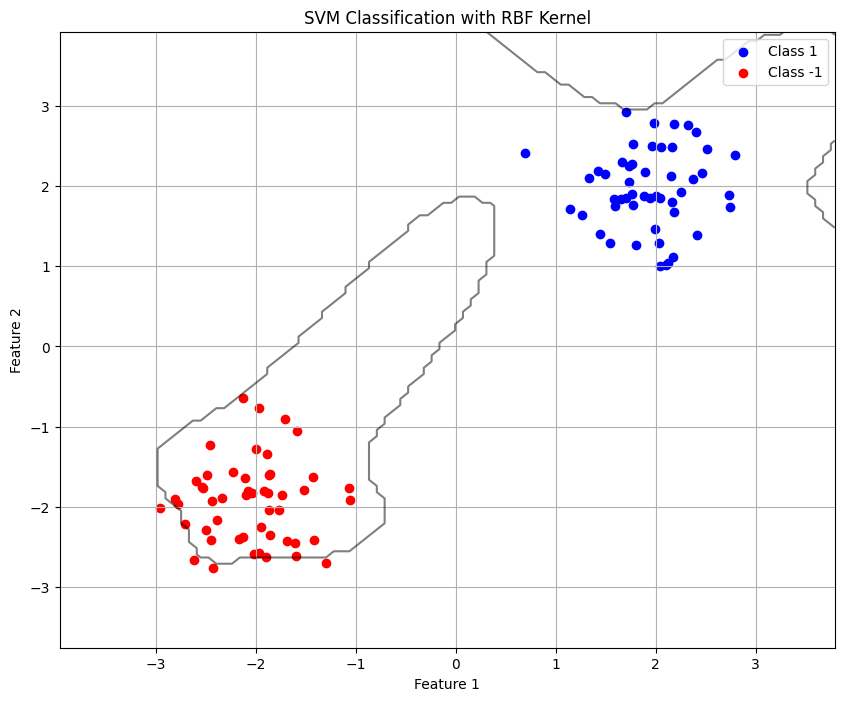

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from svm import SVM

# Generate synthetic data for binary classification
np.random.seed(42)

# Create two clusters of points
n_samples = 100
X1 = np.random.randn(n_samples//2, 2) * 0.5 + np.array([2, 2])
X2 = np.random.randn(n_samples//2, 2) * 0.5 + np.array([-2, -2])

# Combine the data
X = np.vstack([X1, X2])
y = np.hstack([np.ones(n_samples//2), -np.ones(n_samples//2)])

# Create and train SVM model
svm_model = SVM(sigma=0.5, epochs=100)
svm_model.train(X, y)

# Make predictions
y_pred = svm_model.predict(X)

# Calculate accuracy
accuracy = svm_model.score(X, y)
print(f"Accuracy: {accuracy:.2f}")

# Visualize the results
plt.figure(figsize=(10, 8))

# Plot training points
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='blue', label='Class 1')
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], c='red', label='Class -1')

# Create a mesh grid to visualize decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Get predictions for mesh grid points
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contour(xx, yy, Z, colors='k', levels=[0], alpha=0.5, linestyles=['-'])

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Classification with RBF Kernel')
plt.legend()
plt.grid(True)
plt.show()